In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np
#from matplotlib import rcParams
#from scipy import stats

# Ingreso de datos

In [3]:
df = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/data/Data_Final.csv', sep=",",encoding="utf-8",low_memory=False,index_col=0)

# Dar formato de fecha
df['FECHA'] = pd.to_datetime(df['FECHA'], format = "%Y-%m" )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790447 entries, 0 to 790446
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   NRO_SOLICITUD          790447 non-null  int64         
 1   OBLIGACION             790447 non-null  int64         
 2   PAGARE                 790447 non-null  object        
 3   NOM_TIPOCLIENTE        790447 non-null  object        
 4   REGION                 790447 non-null  object        
 5   MUNICIPIO_CLIENTE      790447 non-null  object        
 6   UBICACIO_CLIENTE       790447 non-null  object        
 7   MONTO                  790447 non-null  int64         
 8   FEC_SOLICITUD          790447 non-null  object        
 9   FEC_APROBA             790447 non-null  object        
 10  FEC_DESEMBOLSO         790447 non-null  object        
 11  VALOR_CUOTA            790447 non-null  float64       
 12  CUOTAS_PACTADAS        790447 non-null  floa

In [4]:
# Dataframe ultimo mes registrado
df_ultimo  =  df[df['FECHA'] == df['FECHA'].max()]

# Indicador 1: Total capital vencido en el ultimos mes registrado
cap_ven = df_ultimo['CAPITAL_VEN'].sum()

# Indicador 2: porcentaje de clientes que estan en mora en el ultimos mes registrado
por_mora = df_ultimo['DEUDOR'].sum()/df_ultimo['DEUDOR'].count()

# Indicador 3: Total por pagar en el ultimo mes registrado
total_saldo = df_ultimo['SALDO_OBLIGACION'].sum()


In [20]:
# Agrupar por fecha y variables de interes
df_tiempo = df.groupby(['FECHA','GENERO'], as_index=False).agg(CAPITAL_VENCIDO= ('CAPITAL_VEN','sum'),
                                     DEUDOR_SUMA = ('DEUDOR','sum'),
                                     DEUDOR_COUNT= ('DEUDOR','count'),
                                     SALDO_TOTAL= ('SALDO_OBLIGACION','sum'))

#Poner clientes en mora en porcentajes
df_tiempo['CLIENTES_MORA'] = df_tiempo['DEUDOR_SUMA']/df_tiempo['DEUDOR_COUNT']
df_tiempo.head()

,FECHA,GENERO,CAPITAL_VENCIDO,DEUDOR_SUMA,DEUDOR_COUNT,SALDO_TOTAL,CLIENTES_MORA
0,2017-01-01,Femenino,953838900,2679,8638,24897848474,0.310141
1,2017-01-01,Masculino,853802236,2118,6884,24539220198,0.307670
2,2017-02-01,Femenino,1014769190,2616,8583,24628526797,0.304789
3,2017-02-01,Masculino,947108157,2159,6878,24244493806,0.313899
4,2017-03-01,Femenino,914750690,2502,8639,24372801335,0.289617


<AxesSubplot:xlabel='FECHA', ylabel='CAPITAL_VENCIDO'>

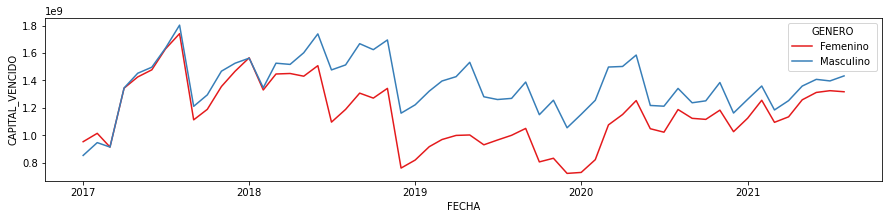

In [21]:
#Plot capital vencido
plt.figure(figsize=(15, 3))
sns.lineplot(x='FECHA',y='CAPITAL_VENCIDO',data=df_tiempo,palette='Set1', ci = None, legend='brief', hue='GENERO')

<AxesSubplot:xlabel='FECHA', ylabel='SALDO_TOTAL'>

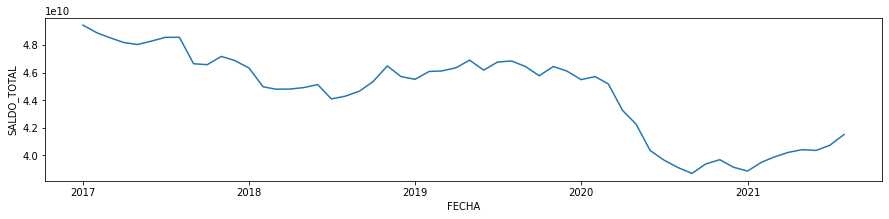

In [16]:
#Plot capital vencido
plt.figure(figsize=(15, 3))
sns.lineplot(x='FECHA',y='SALDO_TOTAL',data=df_tiempo,palette='Set1', ci = None, legend='brief')

<AxesSubplot:xlabel='FECHA', ylabel='CLIENTES_MORA'>

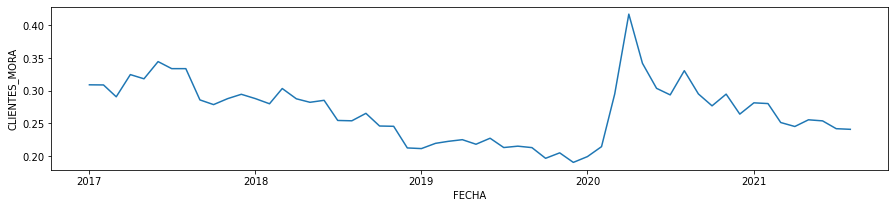

In [17]:
#Plot capital vencido
plt.figure(figsize=(15, 3))
sns.lineplot(x='FECHA',y='CLIENTES_MORA',data=df_tiempo,palette='Set1', ci = None, legend='brief')

In [19]:
df.columns

Index(['NRO_SOLICITUD', 'OBLIGACION', 'PAGARE', 'NOM_TIPOCLIENTE', 'REGION',
       'MUNICIPIO_CLIENTE', 'UBICACIO_CLIENTE', 'MONTO', 'FEC_SOLICITUD',
       'FEC_APROBA', 'FEC_DESEMBOLSO', 'VALOR_CUOTA', 'CUOTAS_PACTADAS',
       'CUOTAS_PENDIENTES', 'PERIODICIDAD', 'CALIFICACION_CIERRE', 'LINEA',
       'COD_MODALIDAD', 'SALDO_OBLIGACION', 'VENCIDA', 'DIAS_VENCIDO',
       'CAPITAL_VEN', 'INTERES_VEN', 'MORA', 'COMISION', 'FEC_ULT.PAGO',
       'FEC_PROXIMO_PAGO', 'VENCIMIENTO_FINAL', 'PORCENTAJE_PAGO',
       'TIPO_CREDITO', 'FECHA', 'TASA_NOM_ANUAL', 'TASA_PERIODICA', 'ID', 'PP',
       'CP', 'GENERO', 'EDAD', 'NIVEL_DE_ESTUDIOS', 'MORA_STATUS', 'SUCURSAL',
       'ESTRATO', 'DESTINACION', 'TIPO_VIVIENDA', 'CODEUDOR_REF', 'DEUDOR',
       'ACUMULADO', 'NIVEL_DE_ESTUDIOS_NEW'],
      dtype='object')